In [1]:
#importing libraries
import pandas as pd
import numpy as np
import pandasai as pdai


In [2]:
#loading csv file into dataframe
df = pd.read_csv('/home/muregz/data_analysis/metro_transport/Metro-Systems-Worldwide.csv')

print(df.head(10))

             City Country\r\nregion                      Name  \
0         Algiers           Algeria             Algiers Metro   
1    Buenos Aires         Argentina  Buenos Aires Underground   
2         Yerevan           Armenia             Yerevan Metro   
3          Sydney         Australia              Sydney Metro   
4          Vienna           Austria             Vienna U-Bahn   
5            Baku        Azerbaijan                Baku Metro   
6           Dhaka        Bangladesh          Dhaka Metro Rail   
7           Minsk           Belarus               Minsk Metro   
8        Brussels           Belgium            Brussels Metro   
9  Belo Horizonte            Brazil      Belo Horizonte Metro   

   Service\r\nopened Last\r\nexpanded  Stations      System length  \
0               2011             2018        19  18.5 km (11.5 mi)   
1               1913             2019        78  56.7 km (35.2 mi)   
2               1981             1996        10   12.1 km (7.5 mi)   
3   

In [3]:
df = df.rename(columns={'Country\r\nregion': 'Country',
                        'Service\r\nopened' : 'Service opened',
                        'Last\r\nexpanded' : 'Last expanded',
                        'Annual ridership\r\n(millions)' : 'Annual ridership in millions'})
print(df.columns)

Index(['City', 'Country', 'Name', 'Service opened', 'Last expanded',
       'Stations', 'System length', 'Annual ridership in millions'],
      dtype='object')


In [4]:
# Split the "Ridership" column into two separate columns
df[['Annual Ridership', 'Year of Record']] = df['Annual ridership in millions'].str.split(' ', n=1, expand=True)

# Remove the parentheses from the "Year of Record" column
df['Year of Record'] = df['Year of Record'].str.strip('()')

# Print the resulting DataFrame
print(df.head(5))

           City    Country                      Name  Service opened  \
0       Algiers    Algeria             Algiers Metro            2011   
1  Buenos Aires  Argentina  Buenos Aires Underground            1913   
2       Yerevan    Armenia             Yerevan Metro            1981   
3        Sydney  Australia              Sydney Metro            2019   
4        Vienna    Austria             Vienna U-Bahn            1978   

  Last expanded  Stations      System length Annual ridership in millions  \
0          2018        19  18.5 km (11.5 mi)                  45.3 (2019)   
1          2019        78  56.7 km (35.2 mi)                  74.0 (2020)   
2          1996        10   12.1 km (7.5 mi)                  23.3 (2022)   
3             –        13      36 km (22 mi)                  16.3 (2022)   
4          2017        98  83.3 km (51.8 mi)                 459.8 (2019)   

  Annual Ridership Year of Record  
0             45.3           2019  
1             74.0           202

In [5]:
df['Annual Ridership'] = df['Annual Ridership'].str.replace(',', '')


print(df['Annual Ridership'])

0       45.3
1       74.0
2       23.3
3       16.3
4      459.8
       ...  
200      2.5
201     93.0
202    136.7
203      358
204      7.5
Name: Annual Ridership, Length: 205, dtype: object


In [6]:
df = df.reset_index()
df.to_csv('output.csv', index=False)

In [7]:
metro = pd.read_excel('/home/muregz/data_analysis/metro_transport/output.ods')
print(metro.head(5))

                       Name          City    Country  Service opened  \
0             Algiers Metro       Algiers    Algeria            2011   
1  Buenos Aires Underground  Buenos Aires  Argentina            1913   
2             Yerevan Metro       Yerevan    Armenia            1981   
3              Sydney Metro        Sydney  Australia            2019   
4             Vienna U-Bahn        Vienna    Austria            1978   

  Last expanded  Stations System length system_length(mi)  \
0          2018        19       18.5 km         (11.5 mi)   
1          2019        78       56.7 km         (35.2 mi)   
2          1996        10       12.1 km          (7.5 mi)   
3             –        13         36 km           (22 mi)   
4          2017        98       83.3 km         (51.8 mi)   

  Annual ridership in millions  Annual Ridership Year of Record  
0                  45.3 (2019)              45.3           2019  
1                  74.0 (2020)              74.0           2020  
2 

# showing which countries appear in the file

In [8]:
country = metro['Country'].unique()
print(country)

['Algeria' 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Bangladesh' 'Belarus' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'Finland' 'France' 'Georgia' 'Germany' 'Greece'
 'Hungary' 'India' 'Indonesia' 'Iran' 'Italy' 'Japan' 'Kazakhstan'
 'North Korea' 'South Korea' 'Malaysia' 'Mexico' 'Netherlands' 'Nigeria'
 'Norway' 'Pakistan' 'Panama' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Russia' 'Singapore' 'Spain' 'Sweden' 'Switzerland'
 'Taiwan' 'Thailand' 'Turkey' 'Ukraine' 'United Arab Emirates'
 'United Kingdom' 'United States' 'Uzbekistan' 'Venezuela' 'Vietnam']


In [9]:
#metro['Annual Ridership'] = metro['Annual Ridership'].astype(float)
metro.dtypes

Name                             object
City                             object
Country                          object
Service opened                    int64
Last expanded                    object
Stations                          int64
System length                    object
system_length(mi)                object
Annual ridership in millions     object
Annual Ridership                float64
Year of Record                   object
dtype: object

# showing which country has the highest annual ridership and the lowest ridership

In [10]:
highest = metro.groupby(['Name', 'Country'])['Annual Ridership'].max()
highest_index = highest.idxmax()
name, country = highest_index
print("Name:", name)
print("Country:", country)
print


Name: Shanghai Metro
Country: China


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [11]:
lowest = metro.groupby(['Name', 'Country'])['Annual Ridership'].min()
lowest_index = lowest.idxmin()
name, country = lowest_index
print("Name:", name)
print("Country:", country)

Name: Ahmedabad Metro
Country: India


# comparing between station length and annual ridership

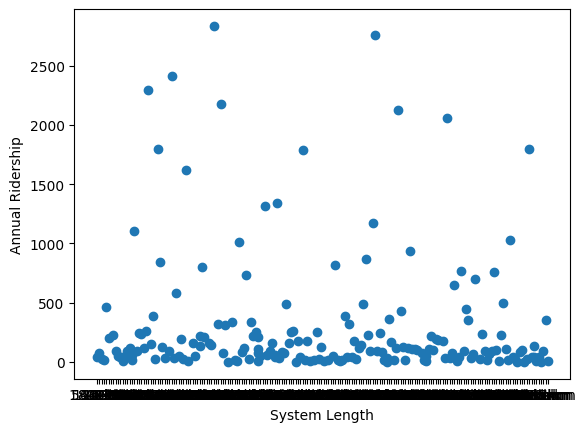

In [12]:
import matplotlib.pyplot as plt


station_length = metro['System length']
annual_ridership = metro['Annual Ridership']

# Create a scatter plot
plt.scatter(station_length, annual_ridership)
plt.xlabel('System Length')
plt.ylabel('Annual Ridership')

# Show the plot
plt.show()


In [37]:
import matplotlib.pyplot as plt

station_length = pd.to_numeric(metro['System length'], errors='coerce').dropna()
annual_ridership = pd.to_numeric(metro['Annual Ridership'], errors='coerce').dropna()

try:
    # Check if either station_length or annual_ridership is empty
    if station_length.empty or annual_ridership.empty:
        raise ValueError("Insufficient data to create the heatmap.")

    # Create a heatmap
    plt.imshow([[length, ridership] for length, ridership in zip(station_length, annual_ridership)], cmap='hot', aspect='auto')
    plt.colorbar(label='Annual Ridership')
    plt.xlabel('Station Length')
    plt.ylabel('Annual Ridership')

    # Show the plot
    plt.show()

except ValueError as e:
    print(str(e))






Insufficient data to create the heatmap.


# comparing stations with annual ridership

In [13]:
s = metro['Stations'].max()
l = metro['Stations'].min()

print(s)
print(l)

424
5


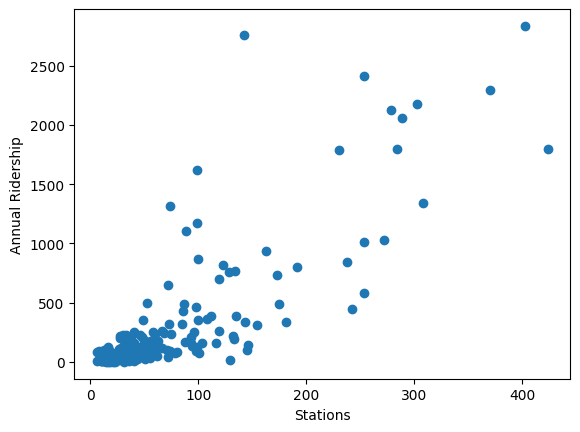

In [14]:
stations = metro['Stations']

plt.scatter(stations, annual_ridership)
plt.xlabel('Stations')
plt.ylabel('Annual Ridership')

plt.show()

# showing which countries have the most number of stations

In [15]:


# Pivot the dataframe
pivoted = pd.pivot_table(metro, values='Stations', index='Country', aggfunc='sum')

pivoted_sorted = pivoted.sort_values(by='Stations', ascending=False)

print(pivoted_sorted.head(10))


                Stations
Country                 
China               5232
United States       1009
South Korea          675
Japan                674
India                645
France               502
Russia               420
Spain                416
Germany              413
United Kingdom       332


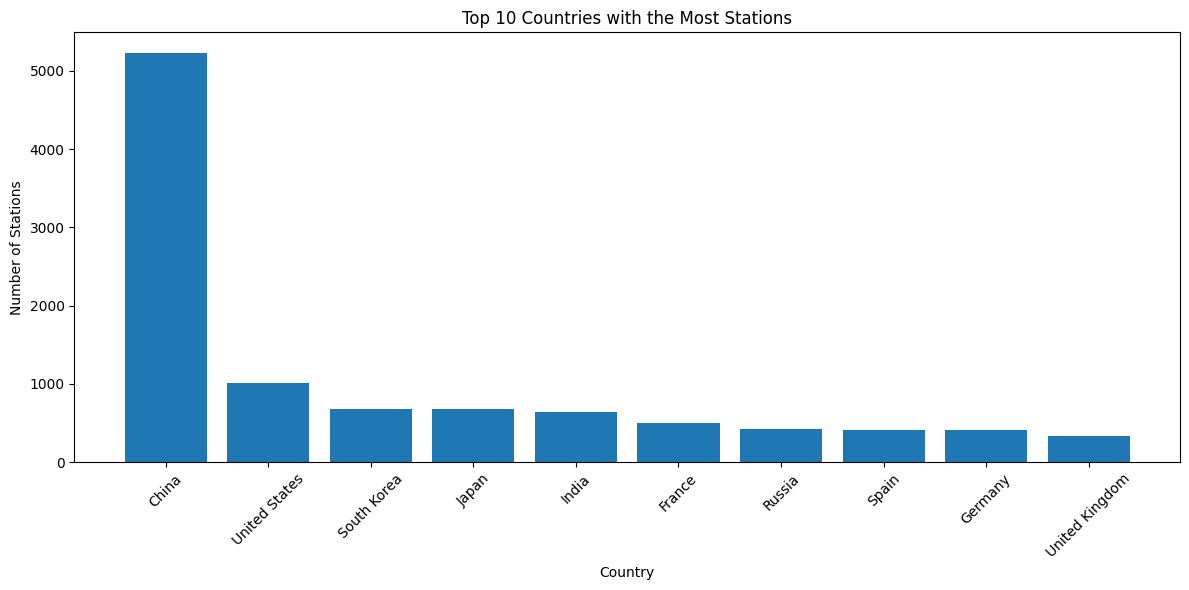

In [16]:
import matplotlib.pyplot as plt

# Select a subset of data (optional, if needed)
subset = pivoted_sorted.head(10)  # Select the top 10 countries

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(subset.index, subset['Stations'])
plt.xlabel('Country')
plt.ylabel('Number of Stations')
plt.title('Top 10 Countries with the Most Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


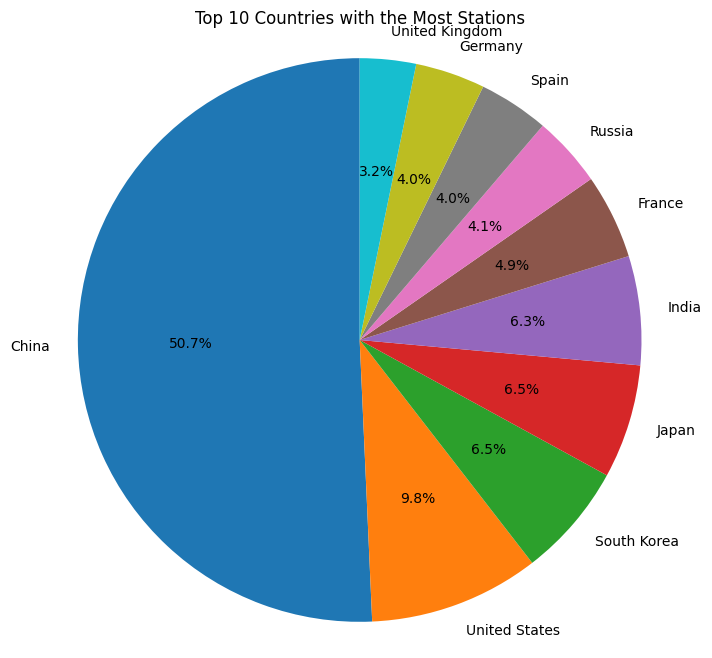

In [17]:
import matplotlib.pyplot as plt


subset = pivoted_sorted.head(10)  

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(subset['Stations'], labels=subset.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Countries with the Most Stations')

plt.axis('equal')
plt.show()


In [30]:
country_ridership = metro.groupby('Country')['Annual Ridership'].sum()
pivoted_country = country_ridership.sort_values(ascending=False)

pivoted_country_df = pivoted_country.reset_index()
print(pivoted_country_df.head(10))




         Country  Annual Ridership
0          China         20716.296
1          Japan          6485.400
2    South Korea          3380.100
3         Russia          2898.600
4          India          2634.920
5  United States          2278.900
6         France          1762.300
7         Brazil          1535.349
8          Egypt          1314.000
9         Mexico          1159.600


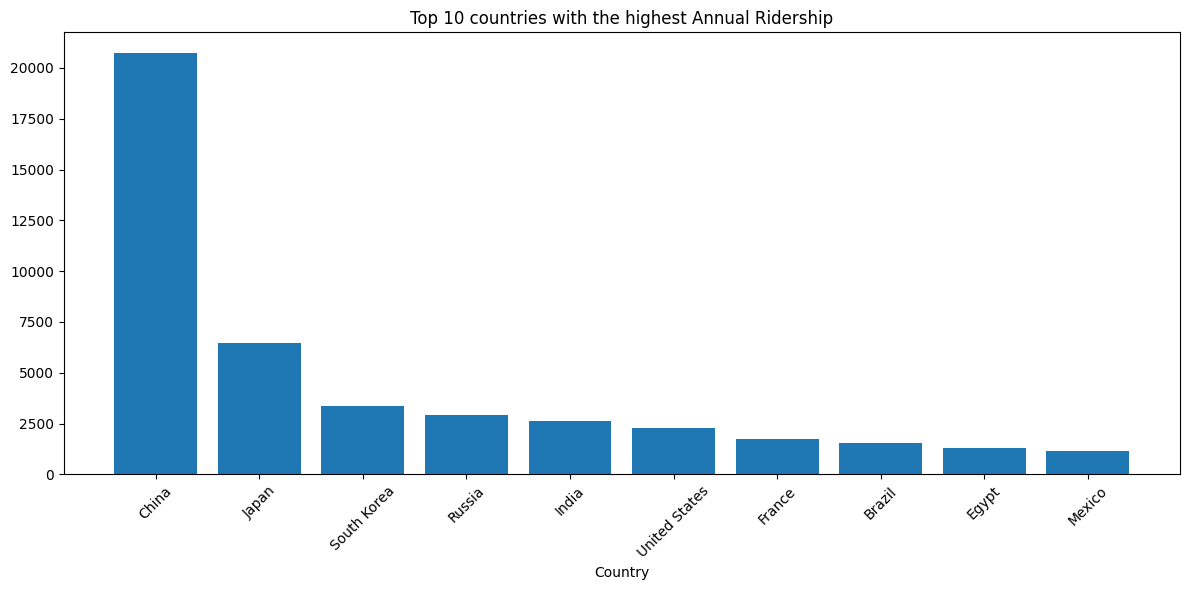

In [28]:
set = pivoted_country_df.head(10)

plt.figure(figsize=(12,6))

plt.bar(set['Country'], set['Annual Ridership'])
plt.xlabel('Annual Ridership in millions')
plt.xlabel('Country')
plt.title('Top 10 countries with the highest Annual Ridership')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

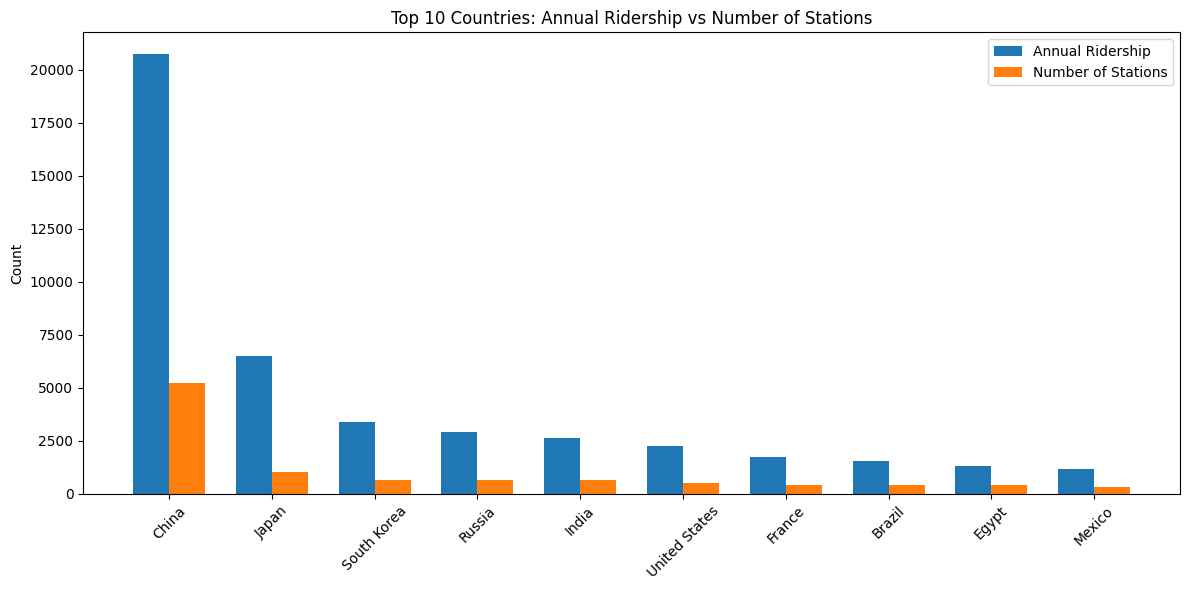

In [45]:
import matplotlib.pyplot as plt
import numpy as np

countries = pivoted_country_df['Country'].head(10)
annual_ridership = pivoted_country_df['Annual Ridership'].head(10)
stations = subset['Stations'].head(10)

x = np.arange(len(countries))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x, annual_ridership, width, label='Annual Ridership')
rects2 = ax.bar(x + width, stations, width, label='Number of Stations')

ax.set_xticks(x + width / 2)
ax.set_xticklabels(countries, rotation=45)

ax.set_ylabel('Count')
ax.set_title('Top 10 Countries: Annual Ridership vs Number of Stations')
ax.legend()

plt.tight_layout()
plt.show()
